# Logistic Regression Training

## Python Imports

In [2]:
import pickle

import numpy as np
from ML.Moderation.notebooks.utilities import data, ml_stats, sampling
from ML.Moderation.notebooks.utilities import train_test_split as tts
from ML.Moderation.notebooks.utilities import vectorize
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfTransformer,
    TfidfVectorizer,
)
from sklearn.linear_model import LogisticRegression

## Load data

In [3]:
df = data.neutral()

In [4]:
df

,class,text
47898,0,Ignatz I want Mandaraxe contribution I cannot ...
113046,0,It seems comments misunderstood editors Englis...
229200,0,Take care Please careful working AfC pages wit...
222499,0,Idonije Plays end also DT
198560,0,Your noteThank note talk page left January You...
...,...,...
194520,0,Semitic I thought Arabic uses root KNN copula ...
29880,0,On per cent easily calculated order get idea g...
214374,0,HiEarlier I created article called Celoxis upl...
171272,0,I new user privileges yet


In [3]:
df_sampled = sampling.undersample(df)

## Training Function

In [4]:
def logreg(X_train, y_train, X_test, name, C=1.0, solver="saga", max_iter=100):
    clf = LogisticRegression(
        C=C, random_state=13, solver=solver, max_iter=max_iter, n_jobs=-1
    )
    clf.fit(X_train, y_train.argmax(axis=1))
    pickle.dump(
        clf, open(f"../../models/neutral_models/{name}.pkl", "wb",),
    )
    return clf.predict(X_test), clf

## TF-IDF Vectorizer

### Vectorization

In [5]:
tfidf_vec, vocab = vectorize.tfidf(
    df_sampled["text"], "logreg", max_df=0.90, min_df=100, vocab=True
)

Time to vectorize:  19.77
Length of vocabulary: 2992


### Train-Test Split

In [6]:
y = tts.encode_outputs(df_sampled["class"])

In [7]:
X_train, X_test, y_train, y_test = tts.split(tfidf_vec, y)

### Training

In [8]:
y_pred, model = logreg(X_train, y_train, X_test, "logreg_tfidf", C=5.0, solver="saga")

### Metrics

In [9]:
ml_stats.class_accuracies(y_test, y_pred)

Class 1 Accuracy: 0.8853877732164651
Class 0 Accuracy: 0.9435948581560284


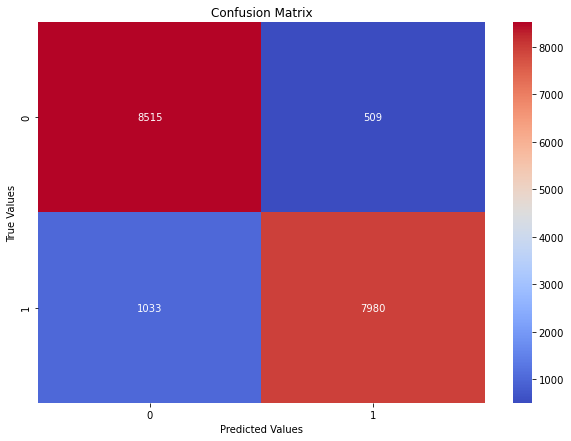

In [10]:
ml_stats.confusion_matrix_plot(y_test, y_pred, 2)

In [11]:
ml_stats.stats(y_test, y_pred, 2)


Accuracy: 0.91

Micro Precision: 0.91
Micro Recall: 0.91
Micro F1-score: 0.91

Macro Precision: 0.92
Macro Recall: 0.91
Macro F1-score: 0.91

Weighted Precision: 0.92
Weighted Recall: 0.91
Weighted F1-score: 0.91

Classification Report

              precision    recall  f1-score   support

     Class 0       0.89      0.94      0.92      9024
     Class 1       0.94      0.89      0.91      9013

    accuracy                           0.91     18037
   macro avg       0.92      0.91      0.91     18037
weighted avg       0.92      0.91      0.91     18037



### Personal Test

In [12]:
vocab_tfidf = pickle.load(
    open("../../models/neutral_models/vectorizers/logreg_tfidf_features.pkl", "rb")
)
transformer = TfidfTransformer()
loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=vocab_tfidf)
test_tfidf = transformer.fit_transform(
    loaded_vec.fit_transform(
        np.array(
            [
                "what are you a homo",
                "I love you",
                "I go to the mall",
                "fuck your mom bitch",
                "hello",
                "I have food",
                "you are gay as fuck",
                "niggers",
                "blessjesus",
            ]
        )
    )
)
preds = model.predict(test_tfidf.toarray())
print(preds)

[1 1 0 1 0 0 1 0 0]


## Count Vectorizer

### Vectorization

In [13]:
count_vec, vocab = vectorize.count(
    df_sampled["text"], "logreg", max_df=0.90, min_df=100, vocab=True
)

Time to vectorize:  17.65
Length of vocabulary: 2992


### Train-Test Split

In [14]:
y = tts.encode_outputs(df_sampled["class"])

In [15]:
X_train, X_test, y_train, y_test = tts.split(count_vec, y)

### Training

In [16]:
y_pred, model = logreg(X_train, y_train, X_test, "logreg_count", max_iter=500)

/Users/brandon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### Metrics

In [18]:
ml_stats.class_accuracies(y_test, y_pred)

Class 1 Accuracy: 0.8326861200488184
Class 0 Accuracy: 0.9532358156028369


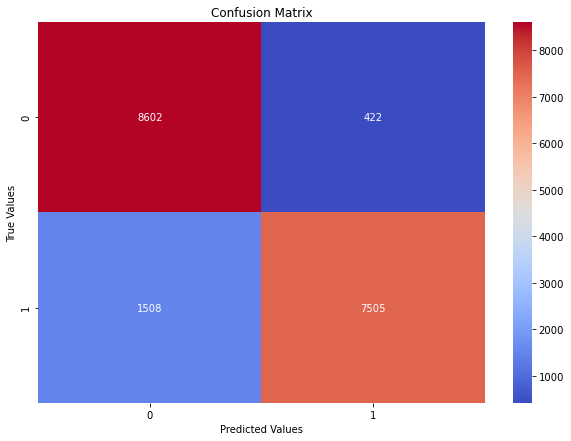

In [19]:
ml_stats.confusion_matrix_plot(y_test, y_pred, 2)

In [20]:
ml_stats.stats(y_test, y_pred, 2)


Accuracy: 0.89

Micro Precision: 0.89
Micro Recall: 0.89
Micro F1-score: 0.89

Macro Precision: 0.90
Macro Recall: 0.89
Macro F1-score: 0.89

Weighted Precision: 0.90
Weighted Recall: 0.89
Weighted F1-score: 0.89

Classification Report

              precision    recall  f1-score   support

     Class 0       0.85      0.95      0.90      9024
     Class 1       0.95      0.83      0.89      9013

    accuracy                           0.89     18037
   macro avg       0.90      0.89      0.89     18037
weighted avg       0.90      0.89      0.89     18037



### Personal Test

In [21]:
vocab_tfidf = pickle.load(
    open("../../models/neutral_models/vectorizers/logreg_count_features.pkl", "rb")
)
loaded_vec = CountVectorizer(decode_error="replace", vocabulary=vocab_tfidf)
test_tfidf = loaded_vec.fit_transform(
    np.array(
        [
            "what are you a homo",
            "I love you",
            "I go to the mall",
            "fuck your mom bitch",
            "hello",
            "I have food",
            "you are gay as fuck",
            "niggers",
            "blessjesus",
        ]
    )
)

preds = model.predict(test_tfidf.toarray())
# print(preds.argmax(axis=1))
print(preds)

[1 0 0 1 0 0 1 0 0]
